In [1]:
import os
import numpy as np
import nibabel as nib
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
path = "../data/"
file = "1010_brain_mr_06.nii.gz"

get_file = lambda path, filename : os.path.join(path,filename)

def show_slices(matrix):
    x,y,z = [int(num/2) for num in matrix.shape]
    slices = matrix[x,:,:], matrix[:,y,:], matrix[:,:,z]
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap='gray', origin="upper")
        
def normalize_3d_matrix(matrix):
    x,y,z = matrix.shape
    matrix = StandardScaler().fit_transform(np.reshape(matrix, (-1,1)))
    return np.reshape(matrix, (x,y,z))


In [3]:
ct_image = nib.load(get_file(path, file))

In [4]:
rawArray = nib.squeeze_image(ct_image).get_fdata()
rawArray.shape

(256, 320, 192)

In [5]:
normArray = normalize_3d_matrix(rawArray)

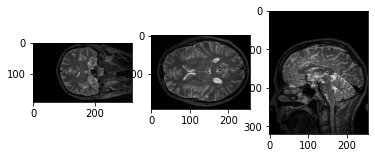

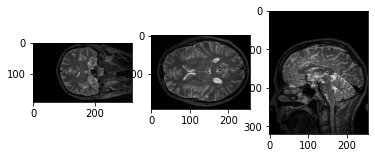

In [6]:
show_slices(normArray)
show_slices(rawArray)

In [7]:
statistic_string = "Before norm {stat} = {beforeStat}, After norm {stat} = {afterStat}"



In [8]:
print(statistic_string.format(stat="mean", beforeStat= rawArray.mean(), afterStat=normArray.mean()))


Before norm mean = 47.74313850402832, After norm mean = 3.608224830031759e-16


In [9]:
print(statistic_string.format(stat="std dev", beforeStat= rawArray.std(), afterStat=normArray.std()))


Before norm std dev = 71.97427883005255, After norm std dev = 0.9999999999999973


In [10]:
print(statistic_string.format(stat="min", beforeStat= rawArray.min(), afterStat=normArray.min()))


Before norm min = 0.0, After norm min = -0.6633361150691145


In [11]:
print(statistic_string.format(stat="max", beforeStat= rawArray.max(), afterStat=normArray.max()))


Before norm max = 658.0, After norm max = 8.478818703233202


In [12]:
import torch

In [13]:
ten = np.copy(normArray)
#ten = np.reshape(ten, (256*320,192))
ten = torch.from_numpy(ten)
ten = ten.unsqueeze(0)
ten = ten.unsqueeze(0)

ten.shape

torch.Size([1, 1, 256, 320, 192])

In [14]:
output = torch.nn.functional.interpolate(ten, scale_factor=(1.75,1.75,1.75), mode='trilinear', align_corners = True,recompute_scale_factor=True)
output = torch.nn.functional.interpolate(output, scale_factor=(1/1.75,1/1.75,1/1.75), mode='trilinear',align_corners = True,recompute_scale_factor=True)

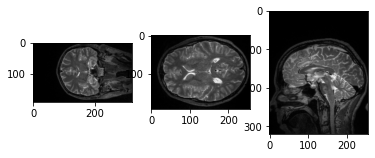

In [15]:
output = output.squeeze(0).squeeze(0)
output = output.numpy()
output = np.reshape(output, (256,320,192))
show_slices(output)


In [16]:
np.save("rescaled",output)

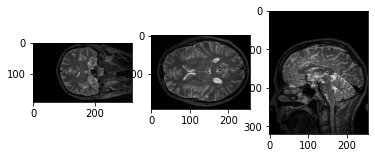

In [17]:
show_slices(normArray)



In [18]:
np.save("original",normArray)